# Tutorial overview

This tutorial shows us how to build a simple regression predictor using XGBoost.

A regression problem is one where "the answer" is either:
  * The percent likelihood of a thing happening (75% chance pwned)
  * The most likely number of a thing (time to failure 35 minutes)
  
In this example, we are predicting the price of a house (or something like it).

This tutorial is largely drawn from the 'further reading' articles but focuses on the aspects of most relevance to this workshop.


## Further Reading

* https://www.datacamp.com/community/tutorials/xgboost-in-python
* https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html


In [1]:
# Data viz libraries (not the best, but standard)
import matplotlib
import matplotlib.pyplot as plt

# Nicer but less common plotting library
import seaborn

# Data loading libraries, good and standard
import pandas as pd
import numpy as np

# Machine learning things
import sklearn.datasets
import xgboost
from sklearn.metrics import mean_squared_error

In [2]:
# Boston housing prices -- presumably not recent!
boston = sklearn.datasets.load_boston()

In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# The ML libraries expect this data structure
# X is the features, y is the target value (e.g. $)
X, y = data.iloc[:,:-1],data.iloc[:,-1]  

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [30]:
xg_reg = xgboost.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 10, n_estimators = 30)

In [31]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [32]:
preds = xg_reg.predict(X_test)

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4.562839


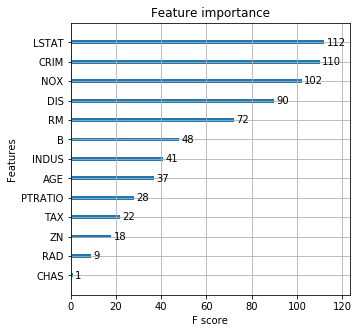

In [34]:
xgboost.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

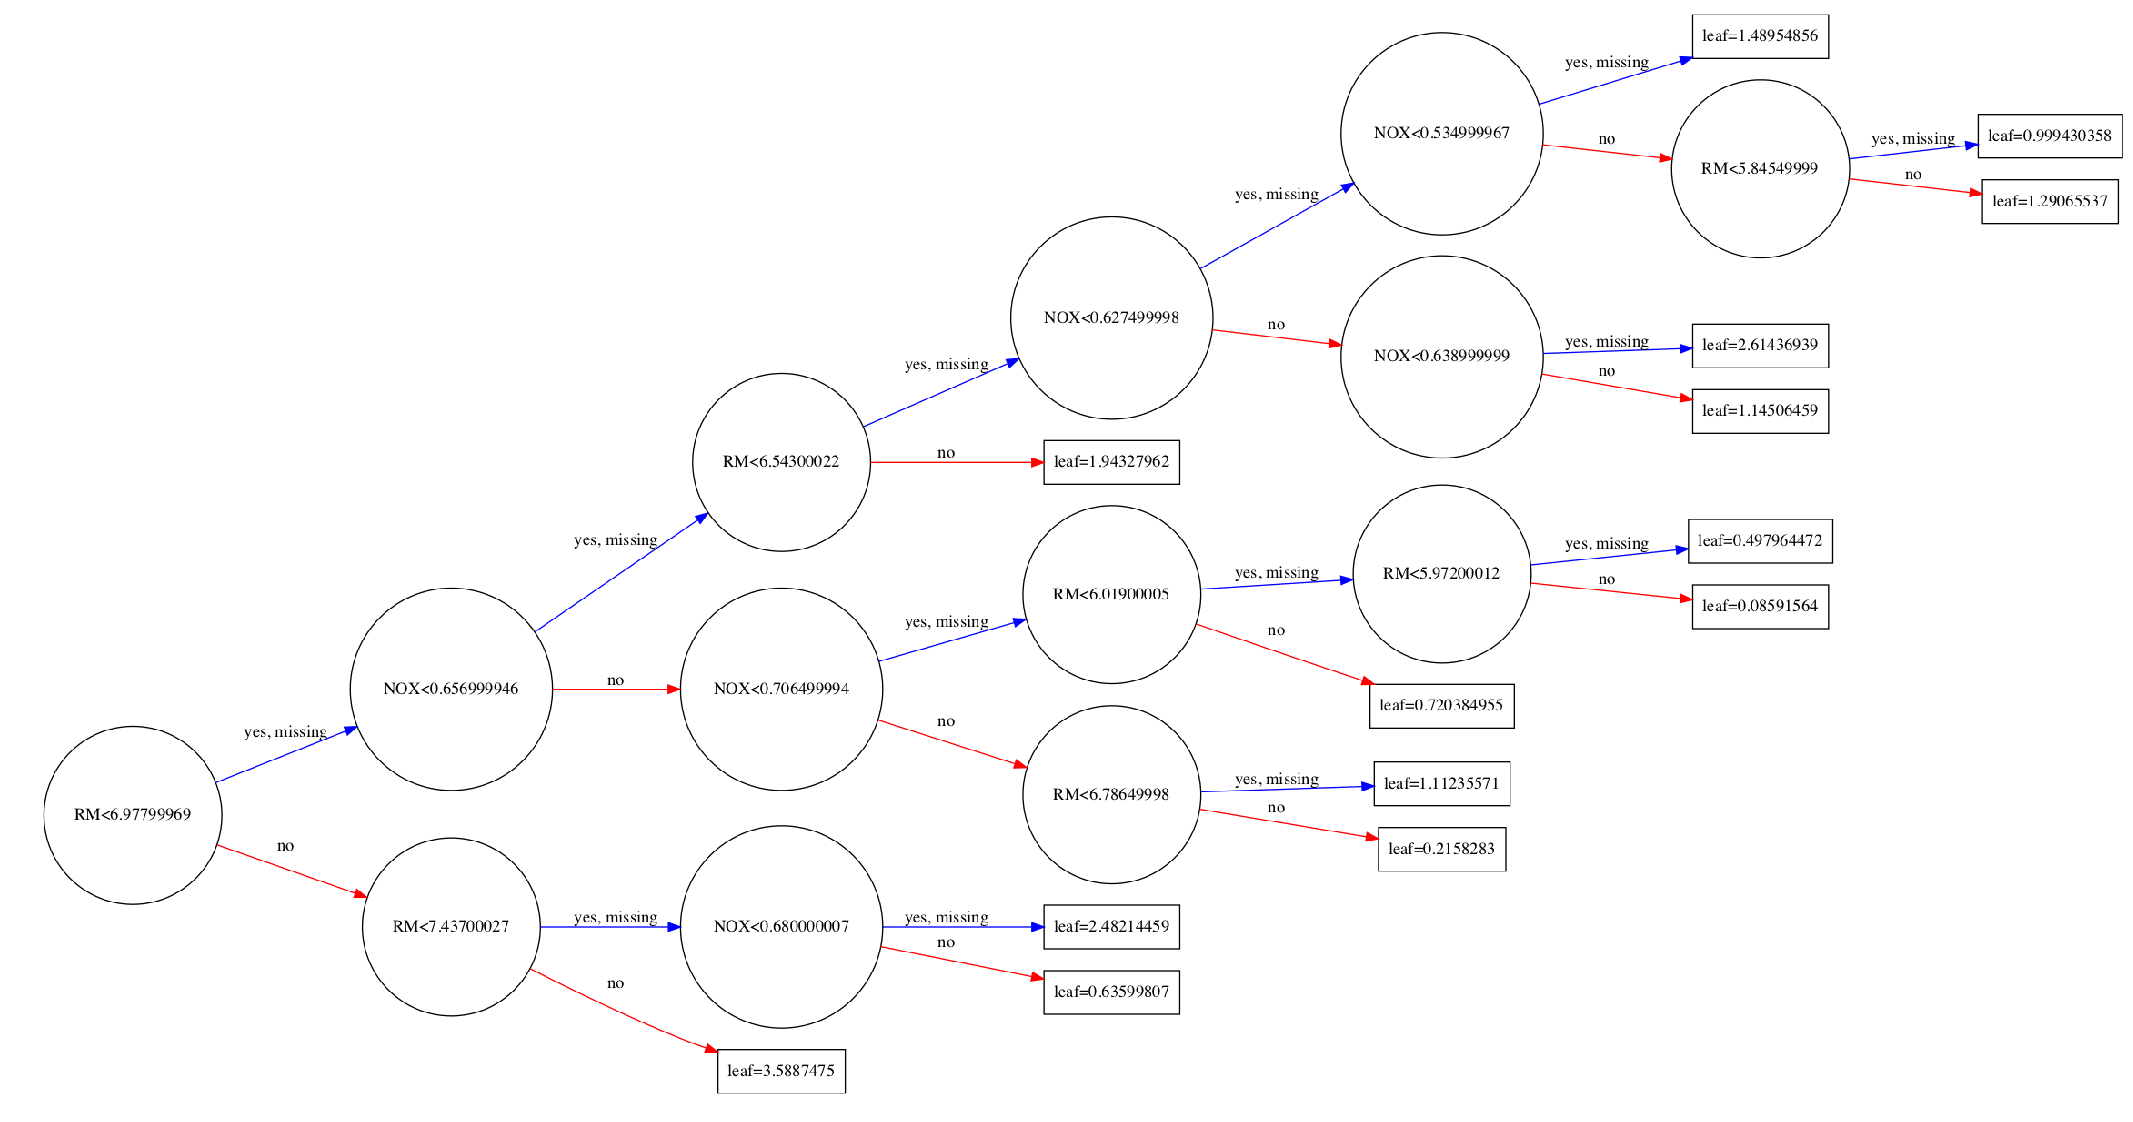

In [51]:
xgboost.plot_tree(xg_reg,num_trees=3, rankdir="LR")
plt.rcParams['figure.figsize'] = [60, 20]
plt.show()

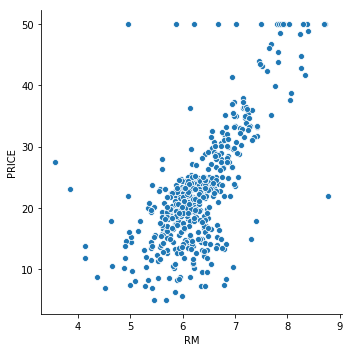

In [39]:
import seaborn as sns
sns.relplot(x="RM", y="PRICE", data=data)

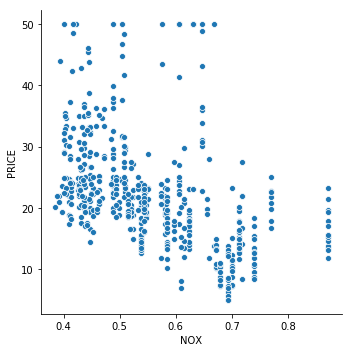

In [44]:
sns.relplot(x="NOX", y="PRICE", data=data)

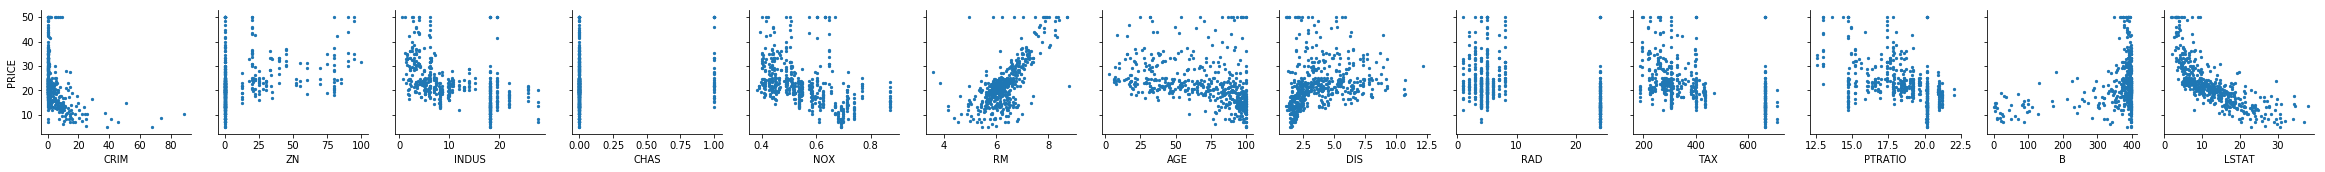

In [50]:
g = sns.PairGrid(data=data, x_vars=boston.feature_names, y_vars=['PRICE'])
g = g.map(plt.scatter, s=5)

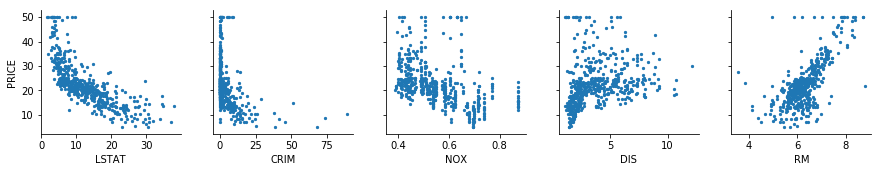

In [49]:
g = sns.PairGrid(data=data, x_vars=['LSTAT', 'CRIM', 'NOX', 'DIS', 'RM'], y_vars=['PRICE'])
g = g.map(plt.scatter, s=5)